<a href="https://colab.research.google.com/github/OhHyunSeo/For_G/blob/main/For_G_Charging_stations_status.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 50 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 123598 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fo

In [ ]:
!pip install chardet

In [ ]:
import pandas as pd

# 파일 경로 설정
file_path = '/content/drive/MyDrive/For_G_Data/Charging_Station_year_info.csv'

# 데이터 읽기 (인코딩 설정)
try:
    data = pd.read_csv(file_path, encoding='euc-kr')
except UnicodeDecodeError:
    data = pd.read_csv(file_path, encoding='cp949')


# 데이터의 첫 5행과 열 확인
print(data.head(10))
print(data.columns)

   설치년도       시도   군구                                주소        충전소명 시설구분(대)  \
0  2017  강원특별자치도  강릉시   강원특별자치도 강릉시 구정면 회산로 88-35 (제비리)  구정(속초) 휴게소    휴게시설   
1  2017  강원특별자치도  강릉시   강원특별자치도 강릉시 구정면 회산로 88-35 (제비리)  구정(속초) 휴게소    휴게시설   
2  2017  강원특별자치도  강릉시   강원특별자치도 강릉시 구정면 회산로 88-35 (제비리)  구정(속초) 휴게소    휴게시설   
3  2017  강원특별자치도  강릉시  강원특별자치도 강릉시 구정면 동해고속도로 345 (제비리)  구정(삼척) 휴게소    휴게시설   
4  2017  강원특별자치도  강릉시  강원특별자치도 강릉시 구정면 동해고속도로 345 (제비리)  구정(삼척) 휴게소    휴게시설   
5  2017  강원특별자치도  강릉시  강원특별자치도 강릉시 구정면 동해고속도로 345 (제비리)  구정(삼척) 휴게소    휴게시설   
6  2017  강원특별자치도  강릉시  강원특별자치도 강릉시 옥계면 동해고속도로 320 (주수리)  옥계(속초) 휴게소    휴게시설   
7  2017  강원특별자치도  강릉시  강원특별자치도 강릉시 옥계면 동해고속도로 320 (주수리)  옥계(속초) 휴게소    휴게시설   
8  2017  강원특별자치도  강릉시  강원특별자치도 강릉시 옥계면 동해고속도로 320 (주수리)  옥계(속초) 휴게소    휴게시설   
9  2017  강원특별자치도  강릉시  강원특별자치도 강릉시 성산면 영동고속도로 231 (보광리)  강릉(강릉) 휴게소    휴게시설   

    시설구분(소) 기종(대)     기종(소) 운영기관(대)  운영기관(소)     급속충전량            충전기타입 이용자제한  \
0  고속도로 휴게소    급속  급속(50kW)     환경부  환경부(협회)  급속(

In [ ]:
# 설치년도별 데이터 그룹화
installation_year_counts = data['설치년도'].value_counts().sort_index()

# 설치년도별 충전소 개수 데이터프레임 생성
installation_year_df = pd.DataFrame({'Year': installation_year_counts.index, 'Count': installation_year_counts.values})

# 데이터프레임 확인
installation_year_df.head()


,Year,Count
0,2015,3
1,2017,58
2,2018,68
3,2019,60
4,2020,105


In [ ]:
# 데이터 그룹화 및 집계
grouped_data = data.groupby(['설치년도', '충전기타입', '기종(대)']).size().reset_index(name='Count')

# 결과 확인
grouped_data.head(10)


,설치년도,충전기타입,기종(대),Count
0,2015,AC완속,완속,2
1,2015,DC차데모+AC3상+DC콤보,급속,1
2,2017,AC완속,완속,18
3,2017,DC차데모+AC3상+DC콤보,급속,40
4,2018,AC완속,완속,38
5,2018,DC차데모+AC3상+DC콤보,급속,8
6,2018,DC차데모+DC콤보,급속,18
7,2018,DC콤보,급속,4
8,2019,AC완속,완속,40
9,2019,DC차데모+AC3상+DC콤보,급속,1


In [ ]:
# 피벗 테이블 생성
pivot_table = grouped_data.pivot_table(values='Count', index='설치년도', columns=['충전기타입', '기종(대)'], fill_value=0)

# 피벗 테이블 확인
pivot_table.head()


충전기타입,AC완속,DC차데모+AC3상+DC콤보,DC차데모+DC콤보,DC콤보
기종(대),완속,급속,급속,급속
설치년도,,,,
2015,2.0,1.0,0.0,0.0
2017,18.0,40.0,0.0,0.0
2018,38.0,8.0,18.0,4.0
2019,40.0,1.0,2.0,17.0
2020,100.0,0.0,0.0,5.0


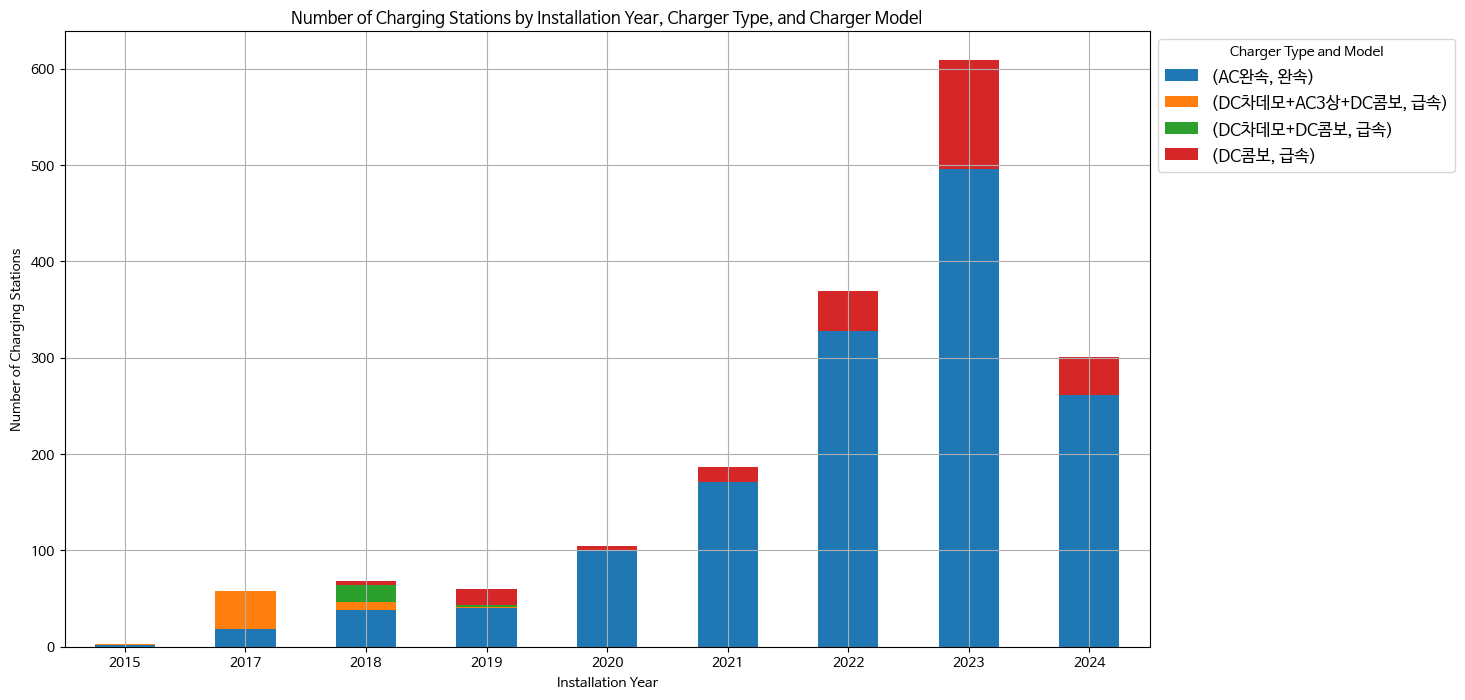

In [ ]:
import matplotlib.pyplot as plt

# 시각화
pivot_table.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Number of Charging Stations by Installation Year, Charger Type, and Charger Model')
plt.xlabel('Installation Year')
plt.ylabel('Number of Charging Stations')
plt.legend(title='Charger Type and Model', bbox_to_anchor=(1.00, 1), loc='upper left', fontsize=12)  # fontsize 조정
plt.xticks(rotation=0)
plt.grid(True)
plt.show()
